# Dimension reduction

This notebook will work on figuring out if reducing input dimension can help model generalize better

**Main goals are**: 
 - Reduce dimension
 - Conclude on best approach 

Let's see how much we can reduce from 35860 dimensions (width = 220 height = 163) by applying mask

In [9]:
# Retreiving a significative amount of data
from local_lib.dataset import retreiveDatasetFromCsv

dataset = retreiveDatasetFromCsv(n_samples=1)
dataset

,pixel_value,class
0,"[30, 33, 32, 32, 31, 31, 30, 29, 29, 29, 28, 2...",0


In [13]:
import numpy as np
image = dataset.iloc[0]["pixel_value"]
np.shape(image)

(35860,)

Displaying data

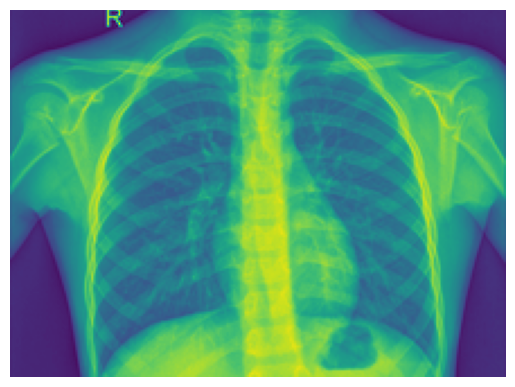

In [16]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image.reshape(163,220))
plt.axis('off')  # Hide axes
plt.show()

We need all this data to print it for human comprehension but computer doesn't need to know about extra points

**Applying most restrictive mask**

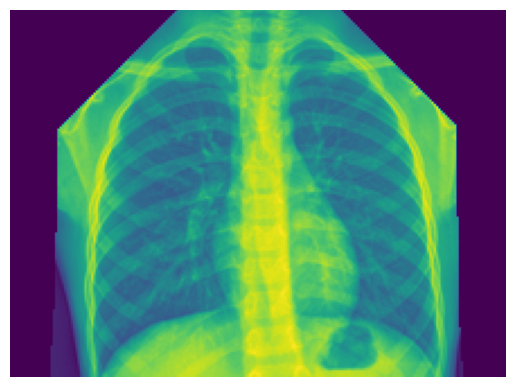

In [19]:
from local_lib.mask_transformer import MaskSeuilTransformer

tr = MaskSeuilTransformer(strategy="combined")
adapted_image = tr.fit_transform(dataset["pixel_value"])

plt.imshow(adapted_image.reshape(163,220))
plt.axis('off')  # Hide axes
plt.show()

Now, instead of setting points to 0 we delete them from tab to reduce dimensions

In [21]:
reduced_images = adapted_image[adapted_image != 0]
reduced_images.shape

(26302,)

We can effectivly gain around **26% dimension reduction**

**Implementing it into pipeline**

In [5]:
from local_lib.non_zero_transformer import NonZeroTransformer
from local_lib.mask_transformer import MaskSeuilTransformer
from local_lib.flatten_transformer import FlattenTransformer
from local_lib.dimension_transformer import DimensionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier

#We reuse previously optimzed params

pipeline_dimension = Pipeline([
    ('flatten_tr', FlattenTransformer()),
    ('non_zero_tr', NonZeroTransformer()),
    ('mask_tr', MaskSeuilTransformer(strategy="combined")),
    ('dimension_tr', DimensionTransformer()),
    ('minmax_tr', Normalizer()),
    ('knn', KNeighborsClassifier(n_neighbors=13)),
])

pipeline_classic = Pipeline([
    ('flatten_tr', FlattenTransformer()),
    ('mask_tr', MaskSeuilTransformer(strategy="combined")),
    ('minmax_tr', Normalizer()),
    ('knn', KNeighborsClassifier(n_neighbors=13)),
])

In [3]:
# Retreiving a significative amount of data
from local_lib.dataset import retreiveDatasetFromCsv
import numpy as np

dataset = retreiveDatasetFromCsv()
dataset = dataset.sample(frac=1, random_state=42)

X = dataset["pixel_value"]
y = np.array(list(dataset["class"]))

In [4]:
np.unique(y)

array([0, 1, 2])

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Dimension reduction done

Fnal shape of X is : 
(3923, 26302)
Dimension reduction done

Fnal shape of X is : 
(1933, 26302)
Test Accuracy: 0.72
Test Precision: 0.74
Test Recall: 0.72
Confusion matrix:



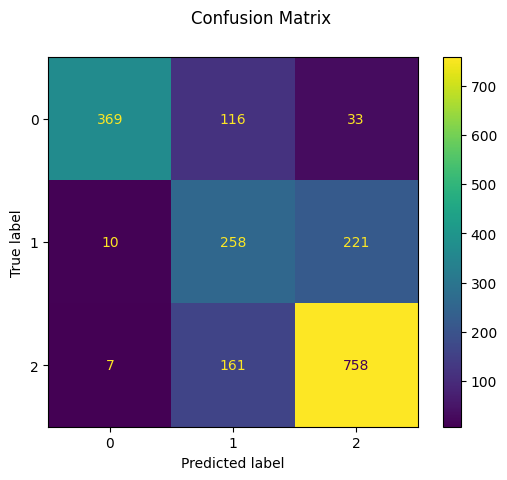

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, accuracy_score

pipeline_dimension.fit(X_train, y_train)
y_pred_simpler = pipeline_dimension.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_simpler)
test_precision = precision_score(y_test, y_pred_simpler, average="weighted")
test_recall = recall_score(y_test, y_pred_simpler, average="weighted")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_simpler)
disp.figure_.suptitle("Confusion Matrix")

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")

print(f"Confusion matrix:\n")
plt.show()

Fnal shape of images is : 
(35860,)
Test Accuracy: 0.72
Test Precision: 0.74
Test Recall: 0.72
Confusion matrix:



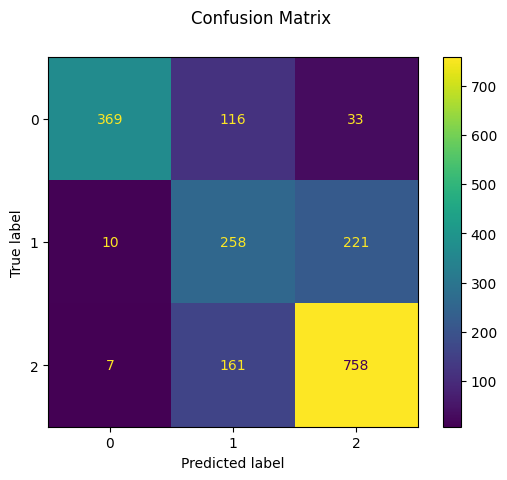

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, accuracy_score

print("Fnal shape of images is : ")
print(X_train[0].flatten().shape)

pipeline_classic.fit(X_train, y_train)
y_pred_simpler = pipeline_classic.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_simpler)
test_precision = precision_score(y_test, y_pred_simpler, average="weighted")
test_recall = recall_score(y_test, y_pred_simpler, average="weighted")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_simpler)
disp.figure_.suptitle("Confusion Matrix")

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")

print(f"Confusion matrix:\n")
plt.show()

No significative change on result

In [11]:
import time

start_time = time.time()

pipeline_dimension.fit(X_train, y_train)

end_time = time.time()

# Compute elapsed time
elapsed_time = end_time - start_time
print(f"Compute time: {elapsed_time:.6f} seconds")

Dimension reduction done

Fnal shape of X is : 
(3923, 26302)
Compute time: 4.728334 seconds


In [12]:
import time

start_time = time.time()

pipeline_classic.fit(X_train, y_train)

end_time = time.time()

# Compute elapsed time
elapsed_time = end_time - start_time
print(f"Compute time: {elapsed_time:.6f} seconds")

Compute time: 3.027734 seconds
